# Evaluation of Classifiers

In [2]:
#Evaluate various classification algorithms performance on a dataset using various measures like True Positive rate, False positive rate, precision, recall etc.
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
dataset = pd.read_csv("C:/Users/CSE/Desktop/ML VI AI&DS-B/Logistic_Iris.csv")
dataset.head

<bound method NDFrame.head of      Sepal Length  Sepal Width  Petal Length  Peatal Width         Species
0             5.1          3.5           1.4           0.2     Iris-setosa
1             4.9          3.0           1.4           0.2     Iris-setosa
2             4.7          3.2           1.3           0.2     Iris-setosa
3             4.6          3.1           1.5           0.2     Iris-setosa
4             5.0          3.6           1.4           0.2     Iris-setosa
..            ...          ...           ...           ...             ...
145           6.7          3.0           5.2           2.3  Iris-virginica
146           6.3          2.5           5.0           1.9  Iris-virginica
147           6.5          3.0           5.2           2.0  Iris-virginica
148           6.2          3.4           5.4           2.3  Iris-virginica
149           5.9          3.0           5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [9]:
# input
x = dataset.iloc[:, [0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
# target
y = dataset.iloc[:, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [12]:
models = []
acc_all = []
pres =[]
tpr=[]
fpr=[]

In [13]:
# Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = classifier.predict(xtest)
acc= accuracy_score(ytest,y_pred)*100
cm = confusion_matrix(ytest, y_pred)
tp = sum(nm.diagonal(cm))
fp = cm[1,0] + cm[2,0]
fn = cm[0,1] + cm[0,2]
tn = cm.sum()-(tp + fp + fn)

In [15]:
# Precision = (TP / (TP/FP))
pres1=tp / (tp + fp)

In [16]:
# Sensitivity, Recall, True Positive Rate = TP/P or TP / (TP+FN)
tpr1 = tp / (tp + fn)

In [17]:
#False Positive Rate =FP / (FP+TN)
fpr1 = fp / (fp + tn)

In [18]:
models.append(classifier)
acc_all.append(acc)
pres.append(pres1)
tpr.append(tpr1)
fpr.append(fpr1)

In [19]:
#For Naïve Bayes Classification
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred = classifier.predict(xtest)
acc= accuracy_score(ytest,y_pred)*100
cm = confusion_matrix(ytest, y_pred)
tp = sum(nm.diagonal(cm))
fp = cm[1,0] + cm[2,0]
fn = cm[0,1] + cm[0,2]
tn = cm.sum()-(tp + fp + fn)

In [21]:
# Precision = (TP / (TP/FP)
pres1=tp / (tp + fp)

In [22]:
# Sensitivity, Recall, True Positive Rate = TP/P or TP / (TP+FN)
tpr1 = tp / (tp + fn)

In [23]:
fpr1 = fp / (fp + tn)

In [24]:
models.append(classifier)
acc_all.append(acc)
pres.append(pres1)
tpr.append(tpr1)
fpr.append(fpr1)

In [25]:
#For Decision Tree based Classification
classifier = DecisionTreeClassifier()
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_pred = classifier.predict(xtest)
acc= accuracy_score(ytest,y_pred)*100
cm = confusion_matrix(ytest, y_pred)
tp = sum(nm.diagonal(cm))
fp = cm[1,0] + cm[2,0]
fn = cm[0,1] + cm[0,2]
tn = cm.sum()-(tp + fp + fn)

In [27]:
# Precision = (TP / (TP/FP)
pres1=tp / (tp + fp)
# Sensitivity, Recall, True Positive Rate = TP/P or TP / (TP+FN)
tpr1 = tp / (tp + fn)
fpr1 = fp / (fp + tn)
models.append(classifier)
acc_all.append(acc)
pres.append(pres1)
tpr.append(tpr1)
fpr.append(fpr1)

In [28]:
#For KNN Classification
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [29]:
y_pred = classifier.predict(xtest)
acc= accuracy_score(ytest,y_pred)*100
cm = confusion_matrix(ytest, y_pred)
tp = sum(nm.diagonal(cm))
fp = cm[1,0] + cm[2,0]
fn = cm[0,1] + cm[0,2]
tn = cm.sum()-(tp + fp + fn)

In [30]:
# Precision = (TP / (TP/FP)
pres1=tp / (tp + fp)

In [31]:
# Sensitivity, Recall, True Positive Rate = TP/P or TP / (TP+FN)
tpr1 = tp / (tp + fn)

In [32]:
fpr1 = fp / (fp + tn)

In [33]:
models.append(classifier)
acc_all.append(acc)
pres.append(pres1)
tpr.append(tpr1)
fpr.append(fpr1)

In [34]:
# For SVM Classification
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
y_pred = classifier.predict(xtest)
acc= accuracy_score(ytest,y_pred)*100
cm = confusion_matrix(ytest, y_pred)
tp = sum(nm.diagonal(cm))
fp = cm[1,0] + cm[2,0]
fn = cm[0,1] + cm[0,2]
tn = cm.sum()-(tp + fp + fn)

In [36]:
# Precision = (TP / (TP/FP)
pres1=tp / (tp + fp)

In [37]:
# Sensitivity, Recall, True Positive Rate = TP/P or TP / (TP+FN)
tpr1 = tp / (tp + fn)

In [38]:
fpr1 = fp / (fp + tn)
models.append(classifier)
acc_all.append(acc)
pres.append(pres1)
tpr.append(tpr1)
fpr.append(fpr1)

In [39]:
print("\n Comparison of Classifiers \n ")


 Comparison of Classifiers 
 


In [40]:
print("\n Classifiers used\n")
models


 Classifiers used



[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                      weights='uniform'),

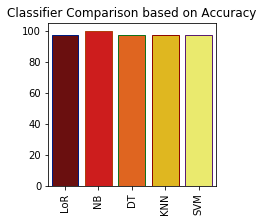

In [41]:
plt.subplots(figsize=(3,3))
labels=['LoR', 'NB', 'DT', 'KNN', 'SVM']
sns.barplot(x=labels,y=acc_all,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Comparison based on Accuracy')
plt.show()

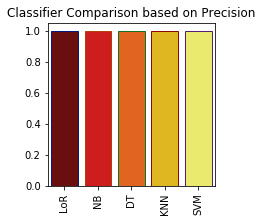

In [42]:
plt.subplots(figsize=(3,3))
labels=['LoR', 'NB', 'DT', 'KNN', 'SVM']
sns.barplot(x=labels,y=pres,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Comparison based on Precision')
plt.show()

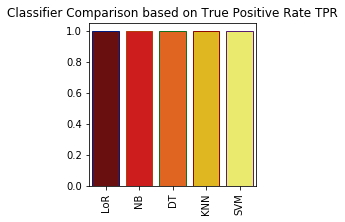

In [43]:
plt.subplots(figsize=(3,3))
labels=['LoR', 'NB', 'DT', 'KNN', 'SVM']
sns.barplot(x=labels,y=tpr,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Comparison based on True Positive Rate TPR')
plt.show()

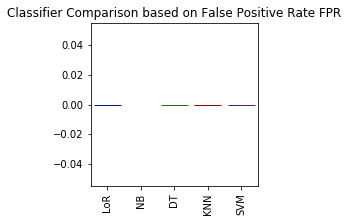

In [44]:
plt.subplots(figsize=(3,3))
labels=['LoR', 'NB', 'DT', 'KNN', 'SVM']
sns.barplot(x=labels,y=fpr,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Comparison based on False Positive Rate FPR')
plt.show()

In [49]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [50]:
from prettytable import PrettyTable
table = PrettyTable()
table.title = 'Comparisson of Classifiers'
table.field_names = ['Classifier', 'Accuracy', 'Precision', 'TPR', 'FPR']
table.add_row(['LoR', acc_all[0],pres[0],tpr[0],fpr[0]])
table.add_row(['NB', acc_all[1],pres[1],tpr[1],fpr[1]])
table.add_row(['DT', acc_all[2],pres[2],tpr[2],fpr[2]])
table.add_row(['KNN', acc_all[3],pres[3],tpr[3],fpr[3]])
table.add_row(['SVM', acc_all[4],pres[4],tpr[4],fpr[4]])
print(table)

+--------------------------------------------------------+
|               Comparisson of Classifiers               |
+------------+-------------------+-----------+-----+-----+
| Classifier |      Accuracy     | Precision | TPR | FPR |
+------------+-------------------+-----------+-----+-----+
|    LoR     | 97.36842105263158 |    1.0    | 1.0 | 0.0 |
|     NB     |       100.0       |    1.0    | 1.0 | nan |
|     DT     | 97.36842105263158 |    1.0    | 1.0 | 0.0 |
|    KNN     | 97.36842105263158 |    1.0    | 1.0 | 0.0 |
|    SVM     | 97.36842105263158 |    1.0    | 1.0 | 0.0 |
+------------+-------------------+-----------+-----+-----+
